In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.fftpack as scfft

plt.rcParams['figure.figsize'] = [8, 5]

#<span style="color:red">word</span>

# Content
- [Initialisation](#Initialisation)
- [PFB](#PFB)
- [Regular FFT](#Regular-FFT)
- [Comparison](#Comparison)
- [Questions](#Questions)

# Initialisation

Initialising the parameters for PFB. We are doing a pure cosine wave, with $N = 8192$. As such, after a 4-tap PFB, we would end up transforming a time stream of length $\frac{1}{4}N = 2048$.

In [2]:
N = np.arange(8192)
t = N/2048
nu = 25.67 # frequency is configured here
sine = np.cos(2*np.pi*nu*t)

In [3]:
#plt.plot(t, sine)

For comparison, a signal of identical length is put under only an FFT.

In [4]:
N2 = np.arange(2048)
t2 = N2/2048
sine2 = np.cos(2*np.pi*nu*t2)

In [5]:
#plt.plot(t2, sine2)

# PFB

Since we are doing a 4-tap PFB, we want a sinc function whose FFT is a 4-wide boxcar.

In [6]:
t_sinc = t - 2
sinc = np.sinc(3.13*t_sinc/np.pi)

In [7]:
#plt.plot(t_sinc, sinc)

In [8]:
# we can verify the choice of the sinc function here.
np.abs(np.fft.rfft(sinc))[0:10]

array([1855.8864616 , 2307.49026972,  961.18469103,  142.57761344,
         65.33581114,   38.38207426,   25.4916855 ,   18.24253327,
         13.7337002 ,   10.7278201 ])

Now, we execute the convolution and the split-and-stacking:

In [9]:
# convolve the sinc and the signal
conv = sinc*sine

In [10]:
# split-and-stack
conv1, conv2, conv3, conv4 = conv[0:2048], conv[2048:4096], conv[4096:6144], conv[6144:8192]
conv_sum = conv1 + conv2 + conv3 + conv4

Finally, we compute the FFT, and graph, both in raw-scale and log-scale.

In [11]:
# FFT here
FFT_conv = np.fft.rfft(conv_sum)

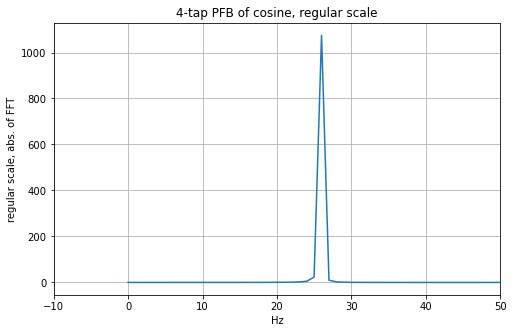

In [12]:
# raw-scale
plt.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_conv))

plt.xlim(-10,50)
plt.xticks(np.arange(-10,50+9,10))

plt.title('4-tap PFB of cosine, regular scale')
plt.ylabel('regular scale, abs. of FFT')
plt.xlabel('Hz')

plt.grid()
plt.show()

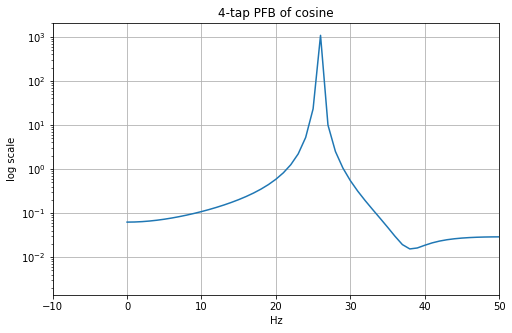

In [13]:
# log-scale
fig_pfb, ax_pfb = plt.subplots()

ax_pfb.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_conv))

ax_pfb.set_xlim(-10,50)
ax_pfb.set_xticks(np.arange(-10,50+9,10))

ax_pfb.set_yscale('log')
ax_pfb.set_title('4-tap PFB of cosine')
ax_pfb.set_ylabel('log scale')
ax_pfb.set_xlabel('Hz')

plt.grid()
plt.show()

# Regular FFT

In [14]:
# compute the FFT
FFT_raw = np.fft.rfft(sine2)

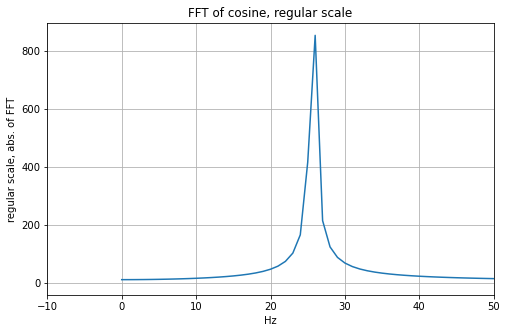

In [15]:
# raw-scale
plt.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_raw))

plt.xlim(-10,50)
plt.xticks(np.arange(-10,50+9,10))

plt.title('FFT of cosine, regular scale')
plt.ylabel('regular scale, abs. of FFT')
plt.xlabel('Hz')

plt.grid()
plt.show()

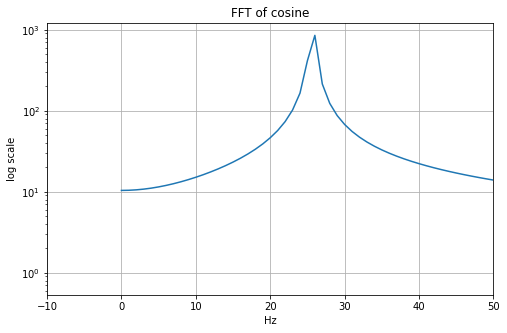

In [16]:
# log-scale
fig_pfb, ax_pfb = plt.subplots()

ax_pfb.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_raw))

ax_pfb.set_xlim(-10,50)
ax_pfb.set_xticks(np.arange(-10,50+9,10))

ax_pfb.set_yscale('log')
ax_pfb.set_title('FFT of cosine')
ax_pfb.set_ylabel('log scale')
ax_pfb.set_xlabel('Hz')

plt.grid()
plt.show()

# Comparison

We graph both raw-scale and log-scale for both regular FFT and PFB, overlaid with each other:

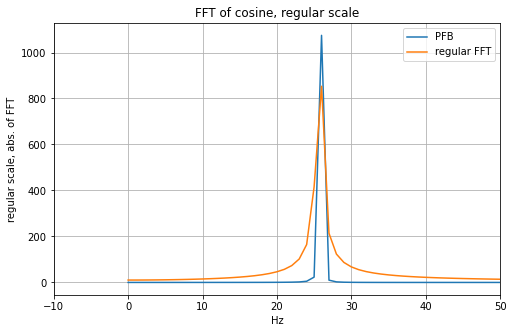

In [17]:
# raw scale
plt.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_conv), label='PFB')
plt.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_raw), label='regular FFT')

plt.xlim(-10,50)
plt.xticks(np.arange(-10,50+9,10))

plt.title('FFT of cosine, regular scale')
plt.ylabel('regular scale, abs. of FFT')
plt.xlabel('Hz')

plt.legend(loc='best')

plt.grid()
plt.show()

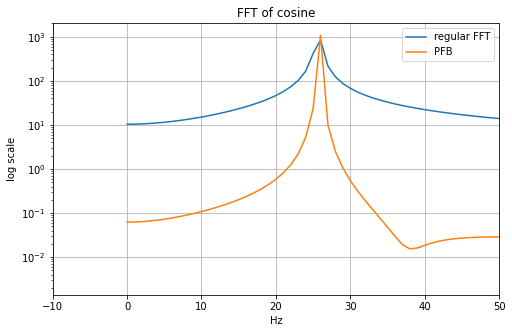

In [18]:
# log-scale
fig_pfb, ax_pfb = plt.subplots()

ax_pfb.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_raw), label='regular FFT')
ax_pfb.plot(np.fft.rfftfreq(2048)*2048, np.abs(FFT_conv), label='PFB')

ax_pfb.set_xlim(-10,50)
ax_pfb.set_xticks(np.arange(-10,50+9,10))

ax_pfb.set_yscale('log')
ax_pfb.set_title('FFT of cosine')
ax_pfb.set_ylabel('log scale')
ax_pfb.set_xlabel('Hz')

ax_pfb.legend(loc='best')

plt.grid()
plt.show()

# Questions

Hopefully I did everything correctly; at least according to the comparison right above, when having non-integer frequency, the power of the transform is significantly smaller with PFB than with regular FFT, especially in the regions adjacent to the peaks. Nevertheless, I still have a few outstanding questions about the technique itself:

1. I still don't fully understand the reasoning for having the 4-wide rectangular function. I know that for example, pointwise multiplying a boxcar in the time space (so carving out a number of periods of the signal) is the same as convolving the Fourier transform of the signal with a sinc function; however, I don't have the physical intuition of what's happening, specifically.

2. This is perhaps directly related to 1, but why are we taking (or intending to take) every fourth (in the case of 4-tap) bin of the incoming time stream? I can see the computational advantage for using a PFB versus simply doing windowed FFT (so multiplying the 4-time long signal with the sinc function, then doing an FFT on the product), since $N\log N$ is the big part here. I also tried just doing a windowed FFT on the regular, $N = 2048$ signal, and found that the result is remarkably worse than that of PFB's, which indicates that there is indeed something that I don't quite understand.

I think I will do some more readings on convolution and DFT's from this point on as well.